# Business Understanding

PT. Indomarco Prismatama adalah perusahaan di bidang retail.
PT. Indomarco Prismatama Cabang mensupply logistik ke setiap Toko Indomaret yang ada.
Dalam hal ini analisis di lakukan pada bagian Area.
Pada bagian Area, melakukan rekap jumlah toko yang abru di buka dan toko tutup untuk mengetahui jumlah kekuatan dan kesiapan setiap cabang pertahunnya.

# Business Problem

Hal ini terpengaruh oleh banyak faktor seperti Permintaan Jumlah Barang, Kubikasi Pengiriman, Lokasi dan sebagainya.
Sehingga pembukaan setiap toko akan sangat terpengaruh.

# Analityc Goals

Atas hal ini analisis di lakukan untuk memprediksi banyaknya jumlah toko yang akan di buka dalam setiap tahun.



# Data Understanding

Dalam analisis kali ini di peroleh data Report Picking melalui Logistic Information System. Di dalam data ini terdapat Time Series dan Value yang menunjukan jumlah toko Indomaret.

#
Bisa di lihat sebagai berikut :

# Deskripsi Library Yang Di Gunakan

In [127]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Memanggil Dataset

In [128]:
df = pd.read_excel('dataset.xlsx')

# Deskripsi Dataset

In [129]:
df.head()

,YEAR,VALUE
0,2012,7.245
1,2013,8.814
2,2014,10.573
3,2015,12.210
4,2016,14.033


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    12 non-null     int64  
 1   VALUE   12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 324.0 bytes


# Transform Data

In [131]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

In [132]:
df.set_index(['YEAR'], inplace=True)

In [133]:
df.head()

,VALUE
YEAR,
2012-01-01,7.245
2013-01-01,8.814
2014-01-01,10.573
2015-01-01,12.210
2016-01-01,14.033


In [134]:
df.index.min(), df.index.max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2023-01-01 00:00:00'))

In [135]:
if (df.index.max() - df.index.min() == 216):
    print ('Data Is Continous')

In [136]:
df.index.freq = 'YS'

In [137]:
df.sort_index(inplace= True)

# Analisa Time Series

<Axes: xlabel='YEAR'>

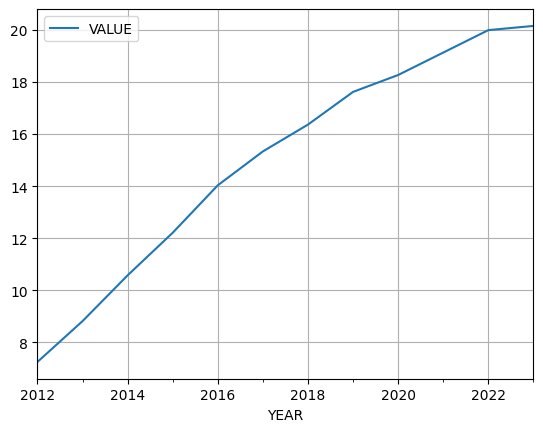

In [138]:
df.plot(grid=True)

In [139]:
train_df = df.loc[:'2020-01-01']
test_df = df.loc['2020-01-01':]

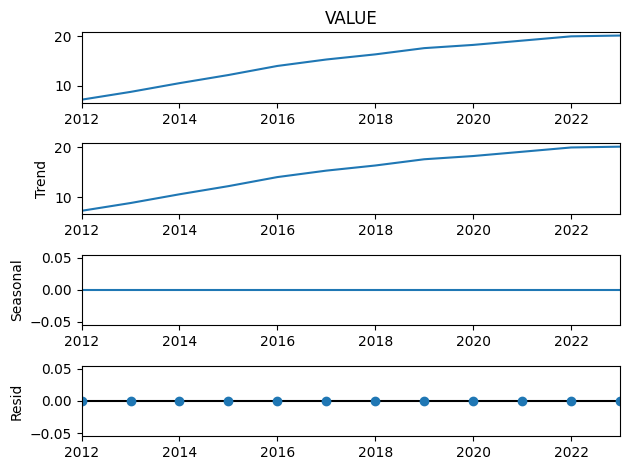

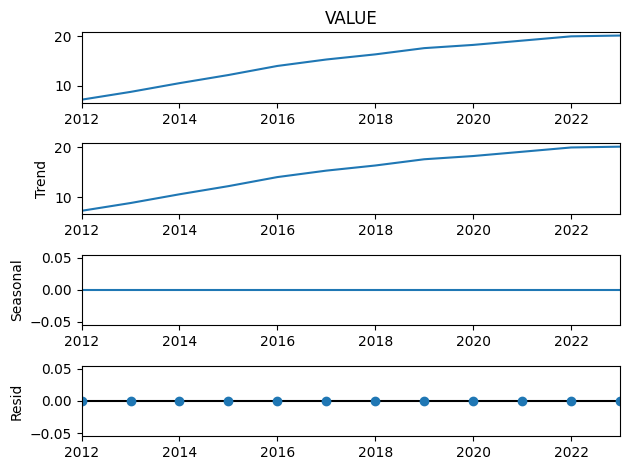

In [140]:
decompose_add = seasonal_decompose(df['VALUE'])
decompose_add.plot()

In [141]:
def adf_test(timeseries):
    print('Hasil Dickey-Fuller')
    print('------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index = ['Test Statistic','P-Value','Lags Used','Number Of Observation Used'])
    for key, Value in adftest[4].items() :
        adf_output['Cricitcal Value (%s)' %key] =  Value
        print (adf_output)       
adf_test(df.values)

Hasil Dickey-Fuller
------------------------------------------
Test Statistic               -4.993175
P-Value                       0.000023
Lags Used                     4.000000
Number Of Observation Used    7.000000
Cricitcal Value (1%)         -4.938690
dtype: float64
Test Statistic               -4.993175
P-Value                       0.000023
Lags Used                     4.000000
Number Of Observation Used    7.000000
Cricitcal Value (1%)         -4.938690
Cricitcal Value (5%)         -3.477583
dtype: float64
Test Statistic               -4.993175
P-Value                       0.000023
Lags Used                     4.000000
Number Of Observation Used    7.000000
Cricitcal Value (1%)         -4.938690
Cricitcal Value (5%)         -3.477583
Cricitcal Value (10%)        -2.843868
dtype: float64


In [142]:
diff_df = df.diff()
diff_df.head()

,VALUE
YEAR,
2012-01-01,NaN
2013-01-01,1.569
2014-01-01,1.759
2015-01-01,1.637
2016-01-01,1.823


In [143]:
diff_df.dropna(inplace=True)

<Axes: xlabel='YEAR'>

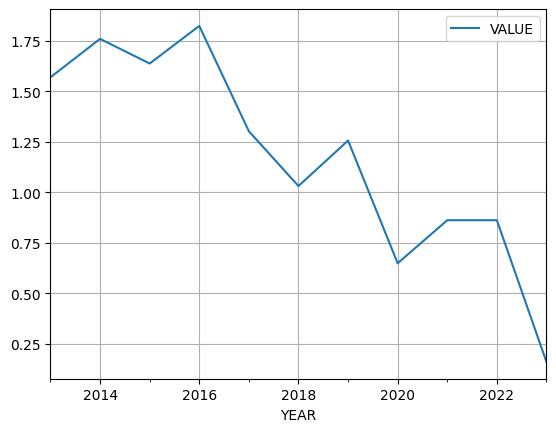

In [144]:
diff_df.plot(grid=True)

In [145]:
adf_test(diff_df)

Hasil Dickey-Fuller
------------------------------------------
Test Statistic               -1.830907
P-Value                       0.365229
Lags Used                     3.000000
Number Of Observation Used    7.000000
Cricitcal Value (1%)         -4.938690
dtype: float64
Test Statistic               -1.830907
P-Value                       0.365229
Lags Used                     3.000000
Number Of Observation Used    7.000000
Cricitcal Value (1%)         -4.938690
Cricitcal Value (5%)         -3.477583
dtype: float64
Test Statistic               -1.830907
P-Value                       0.365229
Lags Used                     3.000000
Number Of Observation Used    7.000000
Cricitcal Value (1%)         -4.938690
Cricitcal Value (5%)         -3.477583
Cricitcal Value (10%)        -2.843868
dtype: float64


C:\Users\Rei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


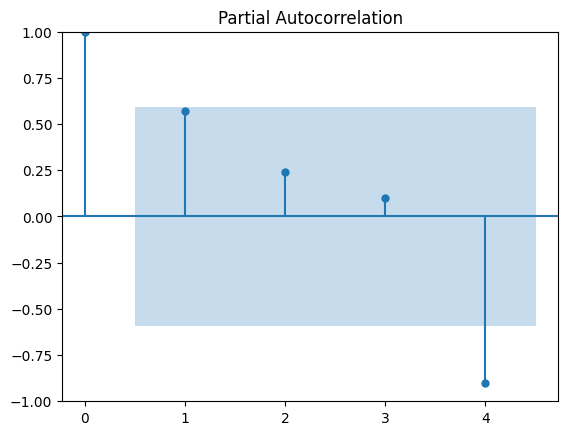

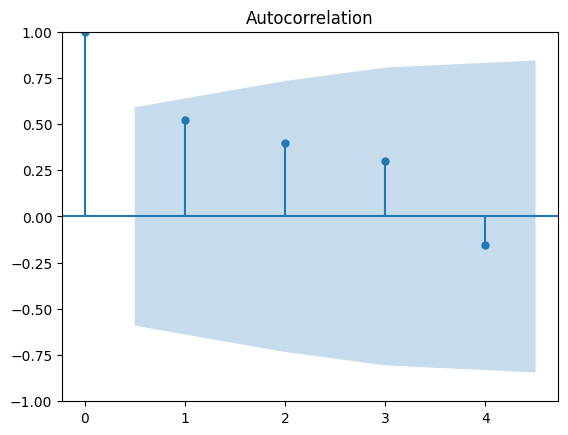

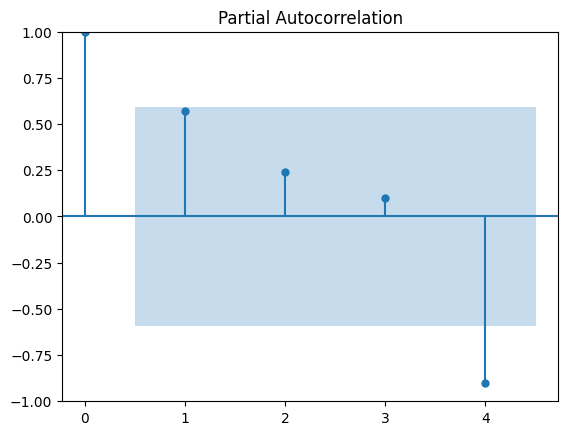

In [146]:
plot_acf(diff_df, lags=4)
plot_pacf(diff_df, lags=4)

# Sigle Exponential Smooting

In [147]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(4)

<Axes: xlabel='YEAR'>

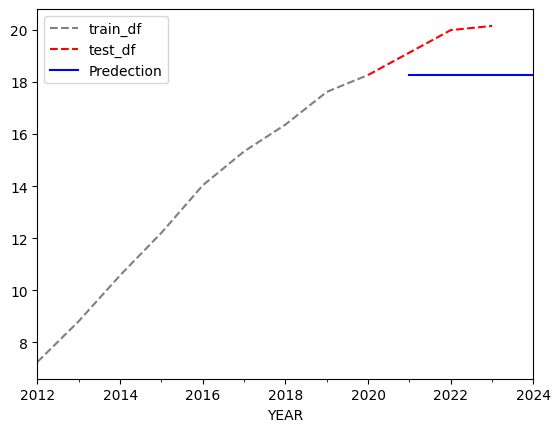

In [148]:
train_df['VALUE'].plot(style="--", color='gray', legend=True, label='train_df')
test_df['VALUE'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Predection')

In [149]:
print('Train RMSE : ',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE : ',mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE : ',mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE : ',mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE :  1.3464291222271119
Test RMSE :  1.348002697185428
Train MAPE :  0.09589483567602725
Test MAPE :  0.05619878672035125


# Double Exponential Smooting

In [150]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='legacy-heuristic', seasonal='add', seasonal_periods=5, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(4)

<Axes: xlabel='YEAR'>

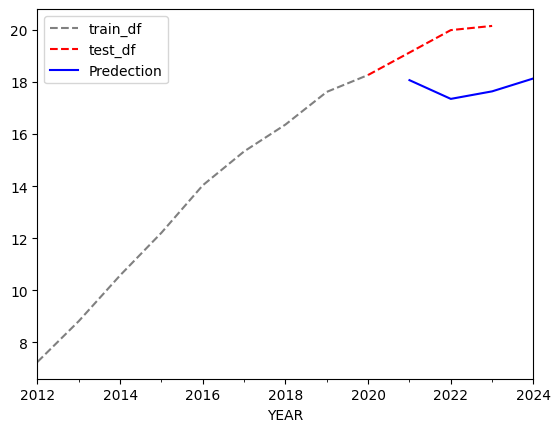

In [151]:
train_df['VALUE'].plot(style="--", color='gray', legend=True, label='train_df')
test_df['VALUE'].plot(style='--', color='red', legend=True, label='test_df')
double_exp_test_pred.plot(color='blue', legend=True, label='Predection')

In [152]:
print('Train RMSE : ',mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE : ',mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE : ',mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE : ',mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE :  1.293699597889039
Test RMSE :  1.7900576041841325
Train MAPE :  0.08671111943198768
Test MAPE :  0.0804316370031247


# ARIMA

In [153]:
ar = ARIMA(train_df, order=(4,1,4)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(4)

C:\Users\Rei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Rei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='YEAR'>

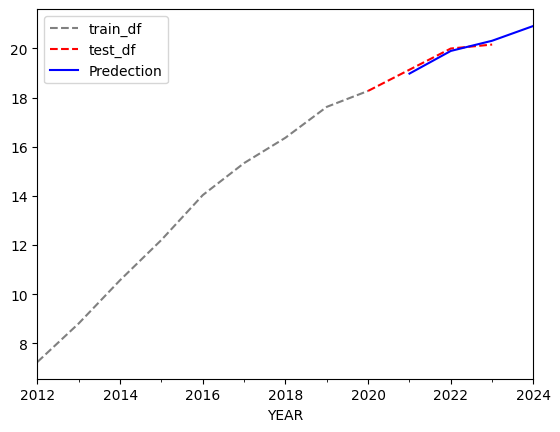

In [154]:
train_df['VALUE'].plot(style="--", color='gray', legend=True, label='train_df')
test_df['VALUE'].plot(style='--', color='red', legend=True, label='test_df')
ar_test_pred.plot(color='blue', legend=True, label='Predection')

In [155]:
print('Train RMSE : ',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE : ',mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE : ',mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE : ',mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE :  2.4803122677471023
Test RMSE :  0.6620079256454483
Train MAPE :  0.14161269125507636
Test MAPE :  0.03296202572693537


In [156]:
comparasion_df = pd.DataFrame(data=[
    ['Single Exp Smooting', 1.348, 0.0561],
    ['Double Exp Smooting', 1.7900, 0.0804],
    ['ARIMA', 0.6620, 0.0329]
    ],
    columns=['Model', 'RMSE', 'MAPE'])
comparasion_df.set_index('Model', inplace=True)

In [157]:
comparasion_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
ARIMA,0.662,0.0329
Single Exp Smooting,1.348,0.0561
Double Exp Smooting,1.790,0.0804


In [168]:
double_exp = ExponentialSmoothing(df, trend=None, initialization_method='legacy-heuristic', seasonal='add', seasonal_periods=5, damped_trend=False).fit()
double_exp_pred = double_exp.forecast(10)

2024-01-01    20.378765
2025-01-01    20.237073
2026-01-01    20.294840
2027-01-01    20.092140
2028-01-01    20.156000
2029-01-01    20.378765
2030-01-01    20.237073
2031-01-01    20.294840
2032-01-01    20.092140
2033-01-01    20.156000
Freq: AS-JAN, dtype: float64


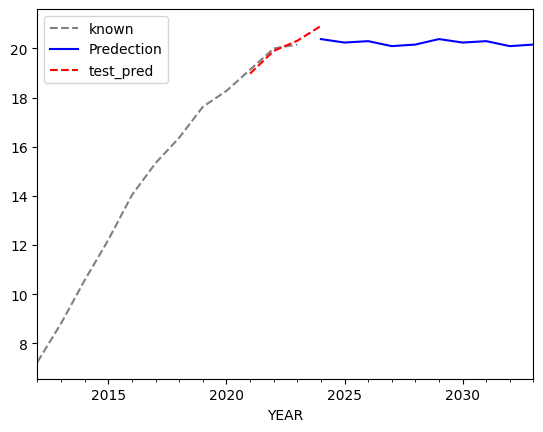

In [170]:
df['VALUE'].plot(style="--", color='gray', legend=True, label='known')
double_exp_pred.plot(color='blue', legend=True, label='Predection')
ar_test_pred.plot(style="--", color='r', legend=True, label='test_pred')

print(double_exp_pred)
plt.show()

In [171]:
import pickle

In [172]:
pickle.dump(ar, open('tokobuka.sav', 'wb'))